In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

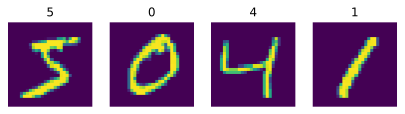

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3))
for img, label, ax in zip(x_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [4]:
x_train = x_train.reshape(60000, 28 * 28) / 255
x_test = x_test.reshape(10000, 28 * 28) / 255

with tf.Session() as sesh:
    y_train = sesh.run(tf.one_hot(y_train, 10))
    y_test = sesh.run(tf.one_hot(y_test, 10))

In [5]:
learning_rate = 0.01
epochs = 50
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [15]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(np.zeros((784, 10)).astype(np.float32))
b = tf.Variable(np.zeros(10).astype(np.float32))
# W = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
# b = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))

In [16]:
pred = tf.nn.softmax(tf.add(tf.matmul(X, W), b))
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch: 0 cost=0.2975
epoch: 2 cost=0.4995
epoch: 4 cost=0.4340
epoch: 6 cost=0.4100
epoch: 8 cost=0.4456
epoch:10 cost=0.2121
epoch:12 cost=0.5741
epoch:14 cost=0.4221
epoch:16 cost=0.3568
epoch:18 cost=0.2380
epoch:20 cost=0.3649
epoch:22 cost=0.3568
epoch:24 cost=0.3334
epoch:26 cost=0.2304
epoch:28 cost=0.2981
epoch:30 cost=0.2377
epoch:32 cost=0.3125
epoch:34 cost=0.1778
epoch:36 cost=0.3822
epoch:38 cost=0.2817
epoch:40 cost=0.3484
epoch:42 cost=0.3137
epoch:44 cost=0.5552
epoch:46 cost=0.2574
epoch:48 cost=0.2181
Accuracy: 91.65%


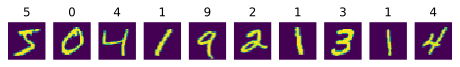

In [17]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={X: x, Y:y})
            c = sesh.run(cost, feed_dict={X:x, Y:y})
        
        if not epoch % 2:
            print(f'epoch:{epoch:2d} cost={c:.4f}')
            
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({X: x_test, Y: y_test})
    print(f'Accuracy: {acc * 100:.2f}%')
    
    fig, axes = plt.subplots(1, 10, figsize=(8, 4))
    for img, ax in zip(x_train[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={X: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')